**INSTAL LIBRARY**

In [1]:
# Install library yang dibutuhkan
!pip install tensorflow pandas scikit-learn

**IMPORT LIBRARY**

In [2]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

**LOAD DATASET**

In [3]:
# Load dataset
url = 'https://raw.githubusercontent.com/gitagpds/dataset_fix/refs/heads/main/gym_and_diet_recommendation_cleaned_data.csv'
df = pd.read_csv(url)

# Tampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14553 entries, 0 to 14552
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14553 non-null  int64  
 1   Sex           14553 non-null  object 
 2   Age           14553 non-null  int64  
 3   Height        14553 non-null  float64
 4   Weight        14553 non-null  float64
 5   Hypertension  14553 non-null  object 
 6   Diabetes      14553 non-null  object 
 7   Exercises     14553 non-null  object 
 8   Diet          14553 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1023.4+ KB
None


In [4]:
print(df.head())

   ID   Sex  Age  Height  Weight Hypertension Diabetes  \
0   1  Male   18    1.68    47.5           No       No   
1   2  Male   18    1.68    47.5          Yes       No   
2   3  Male   18    1.68    47.5           No      Yes   
3   4  Male   18    1.68    47.5          Yes      Yes   
4   5  Male   18    1.68    47.5           No       No   

                                           Exercises  \
0  Squats, deadlifts, bench presses, and overhead...   
1  Squats, deadlifts, bench presses, and overhead...   
2  Squats, yoga, deadlifts, bench presses, and ov...   
3  Squats, yoga, deadlifts, bench presses, and ov...   
4  Squats, deadlifts, bench presses, and overhead...   

                                                Diet  
0  Vegetables: (Carrots, Sweet Potato, and Lettuc...  
1  Vegetables: (Tomatoes, Garlic, leafy greens, b...  
2  Vegetables: (Garlic, Roma Tomatoes, Capers and...  
3  Vegetables: (Garlic, Roma Tomatoes, Capers, Gr...  
4  Vegetables: (Carrots, Sweet Potato, 

**PREPROCESSING DATA**

In [17]:
# Encode kolom kategorikal 'Sex', 'Hypertension', 'Diabetes', and 'Diet'
label_encoders = {}
for col in ['Sex', 'Hypertension', 'Diabetes', 'Diet']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalisasi kolom numerik
scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])

# Pisahkan fitur input dan output
X = df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes']].values
y_diet = to_categorical(df['Diet'].values)

**SPLIT DATASET**

In [18]:
# Split dataset menjadi data latih dan uji
X_train, X_test, y_train_diet, y_test_diet = train_test_split(X, y_diet, test_size=0.2, random_state=42)

**ONE-HOT ENCODING**

In [19]:
y_train_diet = to_categorical(y_train_diet.argmax(axis=-1), num_classes=10)
y_test_diet = to_categorical(y_test_diet.argmax(axis=-1), num_classes=10)

In [20]:
print(f"y_train_diet shape: {y_train_diet.shape}")

y_train_diet shape: (11642, 10)


**BUILD MODEL**

In [21]:
# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layer
hidden_layer = Dense(64, activation='relu')(input_layer)
hidden_layer = Dense(32, activation='relu')(hidden_layer)

# Output layer untuk Diet (10 kelas)
diet_output = Dense(10, activation='softmax', name='diet_output')(hidden_layer)

# Model dengan dua output
model = Model(inputs=input_layer, outputs=[diet_output])

# Compile model
model.compile(optimizer='adam',
              loss={'diet_output': 'categorical_crossentropy'},
              metrics={'diet_output': 'accuracy'})

# Tampilkan ringkasan model
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ diet_output (Dense)                  │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,858 (11.16 KB)

 Trainable params: 2,858 (11.16 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train_diet shape: {y_train_diet.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test_diet shape: {y_test_diet.shape}")

X_train shape: (11642, 6)
y_train_diet shape: (11642, 10)
X_test shape: (2911, 6)
y_test_diet shape: (2911, 10)


In [23]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(y_train_diet)))

False
False


**TRAINING MODEL**

In [26]:
model.compile(
    optimizer='adam',
    loss={
        'diet_output': 'categorical_crossentropy'
    },
    metrics={
        'diet_output': 'accuracy'
    }
)

In [27]:
# Train model
history = model.fit(
    X_train,
    {'diet_output': y_train_diet},
    validation_data=(
        X_test,
        {'diet_output': y_test_diet}
    ),
    epochs=50,
    batch_size=32
)

Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4804 - loss: 1.5495 - val_accuracy: 0.8818 - val_loss: 0.5994
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8946 - loss: 0.5334 - val_accuracy: 0.8949 - val_loss: 0.4719
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.4293 - val_accuracy: 0.8963 - val_loss: 0.4295
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9124 - loss: 0.3778 - val_accuracy: 0.9048 - val_loss: 0.4060
Epoch 5/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9123 - loss: 0.3601 - val_accuracy: 0.9059 - val_loss: 0.3866
Epoch 6/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.3565 - val_accuracy: 0.9024 - val_loss: 0.3760
Epoch 7/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.3350 - val_accuracy: 0.9048 - val_loss: 0.3640
Epoch 8/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9187 - loss: 0.3238 - val_accuracy: 0.

In [28]:
# Evaluasi model
loss, diet_accuracy = model.evaluate(X_test,
                                                         {'diet_output': y_test_diet})

print(f'Loss: {loss}')
print(f'Diet Accuracy: {diet_accuracy}')

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9021 - loss: 0.3005
Loss: 0.26778221130371094
Diet Accuracy: 0.9106836318969727


In [29]:
# Menyimpan model dalam format .h5
model.save('diet_model.h5')

In [30]:
# Mengonversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open('diet_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpgaplnhze'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132008468421216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132008468417168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132008468423856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132008468423504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132008468428784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132008468427904: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [31]:
# Mengunduh model TFLite
from google.colab import files
files.download('diet_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

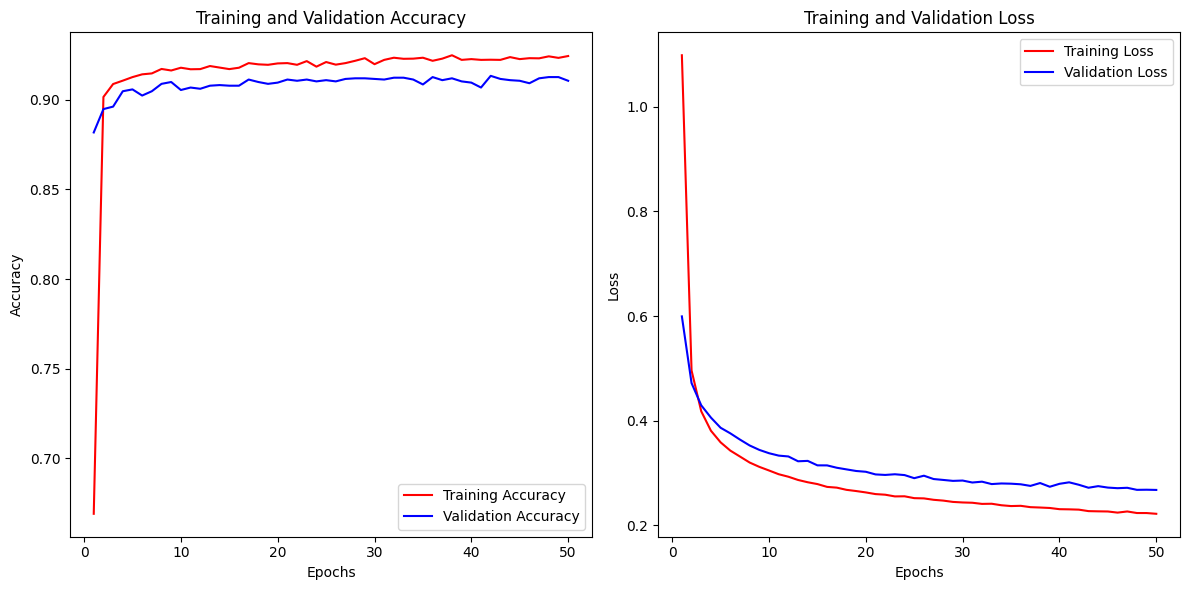

In [32]:
import matplotlib.pyplot as plt

# Ambil data dari history
# Check if the keys are prefixed with output name
if 'exercises_output_accuracy' in history.history:
    train_acc_key = 'exercises_output_accuracy'
    val_acc_key = 'val_exercises_output_accuracy'
    train_loss_key = 'exercises_output_loss'
    val_loss_key = 'val_exercises_output_loss'
else:  # If not, assume they are not prefixed
    train_acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
    train_loss_key = 'loss'
    val_loss_key = 'val_loss'

epochs = range(1, len(history.history[train_acc_key]) + 1)
train_acc = history.history[train_acc_key]  # Training Accuracy
val_acc = history.history[val_acc_key]  # Validation Accuracy
train_loss = history.history[train_loss_key]  # Training Loss
val_loss = history.history[val_loss_key]  # Validation Loss

# Buat plot
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()